# shwamp tracks data extract

In [1]:
import spotipy
import json
import time
import sys
import pandas as pd
import numpy as np

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
client_id = 'e2259109005e4bca90a98a851f042e7e'
client_secret = '7a39ee07c96d451298fa86308bd66ae0'

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [4]:
name = "shwamp" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/3THH3P5beSW2ckKmjsy8F9'},
  'href': 'https://api.spotify.com/v1/artists/3THH3P5beSW2ckKmjsy8F9',
  'id': '3THH3P5beSW2ckKmjsy8F9',
  'name': 'Shwamp',
  'type': 'artist',
  'uri': 'spotify:artist:3THH3P5beSW2ckKmjsy8F9'}]

In [5]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']

#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')

#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])

In [6]:
album_uris

['spotify:album:57e4o7ztEUg6JfIzl6JKtU',
 'spotify:album:4O5mCyfJ0CqPetECCYTETE']

In [7]:
album_names

['Inner Landcape', 'Emergence Unfolding']

### get track ids

In [8]:
tids = []
t_names = []
for i, t in enumerate(result['tracks']['items']):
    print(' ', i, t['name'])
    t_names.append(t['name'])
    tids.append(t['uri'])

  0 Nanogroove For Little Beings
  1 Morning Eel
  2 Floating Sunrise
  3 Glitch Adventure
  4 We're Lost
  5 Tribecall
  6 Stomp Through The Ages
  7 Nostromo 2.0
  8 The Take Off
  9 Dragonfruit


In [9]:
t_names

['Nanogroove For Little Beings',
 'Morning Eel',
 'Floating Sunrise',
 'Glitch Adventure',
 "We're Lost",
 'Tribecall',
 'Stomp Through The Ages',
 'Nostromo 2.0',
 'The Take Off',
 'Dragonfruit']

In [10]:
start = time.time()
features = sp.audio_features(tids)
delta = time.time() - start
print("time to get the data = ",delta)

time to get the data =  0.3796253204345703


In [11]:
len(features)

10

In [12]:
features[0]

{'danceability': 0.74,
 'energy': 0.49,
 'key': 5,
 'loudness': -11.761,
 'mode': 0,
 'speechiness': 0.0498,
 'acousticness': 0.0558,
 'instrumentalness': 0.774,
 'liveness': 0.236,
 'valence': 0.341,
 'tempo': 99.992,
 'type': 'audio_features',
 'id': '57CmGnGJp0yBZBuUPm5qzR',
 'uri': 'spotify:track:57CmGnGJp0yBZBuUPm5qzR',
 'track_href': 'https://api.spotify.com/v1/tracks/57CmGnGJp0yBZBuUPm5qzR',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/57CmGnGJp0yBZBuUPm5qzR',
 'duration_ms': 319200,
 'time_signature': 4}

In [13]:
features[0]['danceability']

0.74

# check about popularity **************************

In [14]:
t_popularity = []
for track in tids:
    pop = sp.track(track)
    # pop is a dict with many attributes, we are interested at the moment in popularity
    t_popularity.append(pop['popularity'])

In [15]:
def get_tracks_features_into_dict(tracks_features):
    t_id = []
    t_danceability = []
    t_energy = []
    t_loudness = []
    t_speechiness = []
    t_acousticness = []
    t_instrumentalness = []
    t_liveness = []
    t_valence = []
    t_tempo = []
    t_duration_ms = []
    for i in range(len(t_names)):
        t_id.append(tracks_features[i]['id'])
        t_danceability.append(tracks_features[i]['danceability'])
        t_energy.append(tracks_features[i]['energy'])
        t_loudness.append(tracks_features[i]['loudness'])
        t_speechiness.append(tracks_features[i]['speechiness'])
        t_acousticness.append(tracks_features[i]['acousticness'])
        t_instrumentalness.append(tracks_features[i]['instrumentalness'])
        t_liveness.append(tracks_features[i]['liveness'])
        t_valence.append(tracks_features[i]['valence'])
        t_tempo.append(tracks_features[i]['tempo'])
        t_duration_ms.append(tracks_features[i]['duration_ms'])
    #create a dictionary    
    d = {'id':t_id,
         'danceability':t_danceability,
         'energy':t_energy,
         'loudness':t_loudness,
         'speechiness':t_speechiness,
         'acousticness':t_acousticness,
         'instrumentalness':t_instrumentalness,
         'liveness':t_liveness,
         'valence':t_valence,
         'tempo':t_tempo,
         'duration_ms':t_duration_ms
    }
    
    return d

In [16]:
songs_features_dict = get_tracks_features_into_dict(features)

In [17]:
songs_features_dict

{'id': ['57CmGnGJp0yBZBuUPm5qzR',
  '4aPdxg7coOhK1sIOdFoEvz',
  '0lKTTBumjYNy3Ympwum22k',
  '2TSnuGizgE7r9kVIAWEcRX',
  '7DNfdaGjoVx1XsG8ayLK3k',
  '1iABfQS7143I480wUwnzuH',
  '3yIRo8eyRwq7o8rcGpiw5D',
  '50c5dflO4S9S1OwYlovVdG',
  '0tejXZ3pnzPJlvNQe2Uzi1',
  '6clWHhtijogwoBRxhw3VWR'],
 'danceability': [0.74,
  0.686,
  0.735,
  0.751,
  0.704,
  0.754,
  0.807,
  0.678,
  0.788,
  0.604],
 'energy': [0.49, 0.571, 0.706, 0.618, 0.57, 0.54, 0.515, 0.417, 0.609, 0.573],
 'loudness': [-11.761,
  -14.088,
  -10.339,
  -13.605,
  -12.357,
  -11.831,
  -11.72,
  -12.824,
  -12.519,
  -11.323],
 'speechiness': [0.0498,
  0.0557,
  0.043,
  0.0588,
  0.0541,
  0.0468,
  0.0517,
  0.0797,
  0.0462,
  0.042],
 'acousticness': [0.0558,
  0.0255,
  0.206,
  0.226,
  0.223,
  0.126,
  0.215,
  0.0344,
  0.0193,
  0.0977],
 'instrumentalness': [0.774,
  0.754,
  0.861,
  0.877,
  0.873,
  0.705,
  0.857,
  0.842,
  0.874,
  0.763],
 'liveness': [0.236,
  0.645,
  0.0958,
  0.199,
  0.0933,
  0.121,


## create dataframe

In [18]:
df = pd.DataFrame(songs_features_dict)
df.head()

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,57CmGnGJp0yBZBuUPm5qzR,0.740,0.490,-11.761,0.0498,0.0558,0.774,0.2360,0.341,99.992,319200
1,4aPdxg7coOhK1sIOdFoEvz,0.686,0.571,-14.088,0.0557,0.0255,0.754,0.6450,0.354,154.007,370909
2,0lKTTBumjYNy3Ympwum22k,0.735,0.706,-10.339,0.0430,0.2060,0.861,0.0958,0.118,99.997,403200
3,2TSnuGizgE7r9kVIAWEcRX,0.751,0.618,-13.605,0.0588,0.2260,0.877,0.1990,0.386,99.955,292800
4,7DNfdaGjoVx1XsG8ayLK3k,0.704,0.570,-12.357,0.0541,0.2230,0.873,0.0933,0.174,99.983,460800


In [19]:
df.insert(11, "popularity", pd.Series(t_popularity) , True) 

In [20]:
df.insert(12, "track_type", 'chill glitch' , True)

In [21]:
df

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,track_type
0,57CmGnGJp0yBZBuUPm5qzR,0.740,0.490,-11.761,0.0498,0.0558,0.774,0.2360,0.3410,99.992,319200,4,chill glitch
1,4aPdxg7coOhK1sIOdFoEvz,0.686,0.571,-14.088,0.0557,0.0255,0.754,0.6450,0.3540,154.007,370909,5,chill glitch
2,0lKTTBumjYNy3Ympwum22k,0.735,0.706,-10.339,0.0430,0.2060,0.861,0.0958,0.1180,99.997,403200,3,chill glitch
3,2TSnuGizgE7r9kVIAWEcRX,0.751,0.618,-13.605,0.0588,0.2260,0.877,0.1990,0.3860,99.955,292800,3,chill glitch
4,7DNfdaGjoVx1XsG8ayLK3k,0.704,0.570,-12.357,0.0541,0.2230,0.873,0.0933,0.1740,99.983,460800,3,chill glitch
5,1iABfQS7143I480wUwnzuH,0.754,0.540,-11.831,0.0468,0.1260,0.705,0.1210,0.1850,130.016,302769,2,chill glitch
6,3yIRo8eyRwq7o8rcGpiw5D,0.807,0.515,-11.720,0.0517,0.2150,0.857,0.1600,0.1580,115.019,319304,5,chill glitch
7,50c5dflO4S9S1OwYlovVdG,0.678,0.417,-12.824,0.0797,0.0344,0.842,0.1140,0.2070,180.028,346000,4,chill glitch
8,0tejXZ3pnzPJlvNQe2Uzi1,0.788,0.609,-12.519,0.0462,0.0193,0.874,0.0796,0.0455,118.013,292881,4,chill glitch
9,6clWHhtijogwoBRxhw3VWR,0.604,0.573,-11.323,0.0420,0.0977,0.763,0.0909,0.1450,168.050,342857,4,chill glitch


In [22]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,0.724700,0.560900,-12.236700,0.052780,0.12287,0.818000,0.183460,0.21135,126.506000,345072.000000,3.700000
std,0.059016,0.078342,1.097098,0.010915,0.08771,0.062729,0.170119,0.11217,30.509307,53773.505277,0.948683
min,0.604000,0.417000,-14.088000,0.042000,0.01930,0.705000,0.079600,0.04550,99.955000,292800.000000,2.000000
25%,0.690500,0.521250,-12.747750,0.046350,0.03975,0.765750,0.093925,0.14825,99.993250,306876.750000,3.000000
50%,0.737500,0.570500,-12.094000,0.050750,0.11185,0.849500,0.117500,0.17950,116.516000,331080.500000,4.000000
75%,0.753250,0.600000,-11.730250,0.055300,0.21275,0.870000,0.189250,0.30750,148.009250,364681.750000,4.000000
max,0.807000,0.706000,-10.339000,0.079700,0.22600,0.877000,0.645000,0.38600,180.028000,460800.000000,5.000000


# DISTRIBUTIONS

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
sns.set()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']

In [25]:
fig_size

[6.0, 4.0]

In [26]:
# SET WIDTH AND HEIGHT
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

###  duration ms dist

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'duration_min')

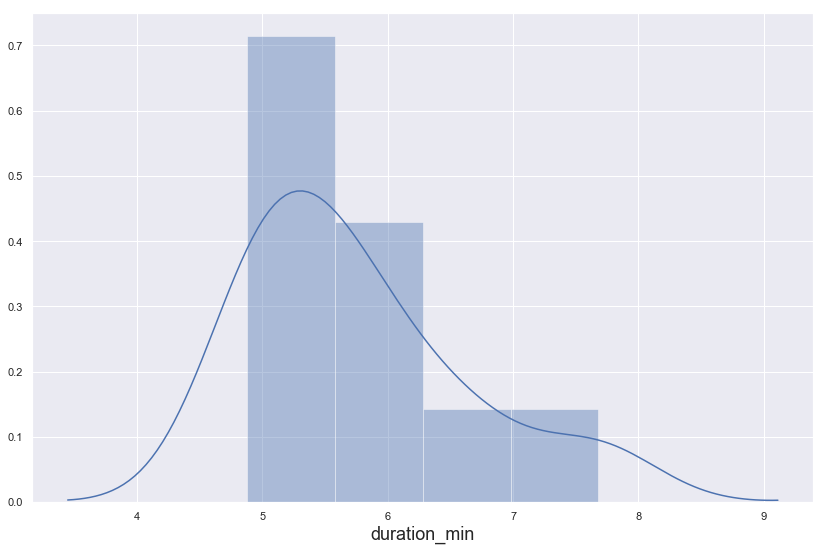

In [27]:
sns.distplot((df.duration_ms/1000.0)/60.0)
plt.xlabel('duration_min',fontsize=18)

### other features distributions

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


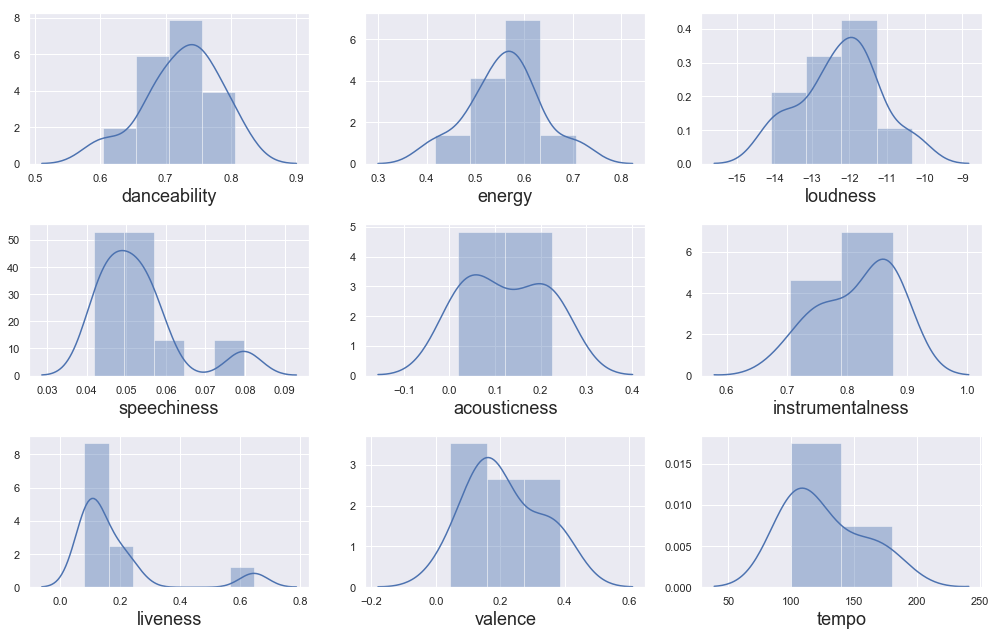

In [28]:
plt.subplot(331)
sns.distplot(df.danceability)
plt.xlabel('danceability', fontsize=18)

plt.subplot(332)
sns.distplot(df.energy)
plt.xlabel('energy', fontsize=18)

plt.subplot(333)
sns.distplot(df.loudness)
plt.xlabel('loudness', fontsize=18)

plt.subplot(334)
sns.distplot(df.speechiness)
plt.xlabel('speechiness', fontsize=18)

plt.subplot(335)
sns.distplot(df.acousticness)
plt.xlabel('acousticness', fontsize=18)

plt.subplot(336)
sns.distplot(df.instrumentalness)
plt.xlabel('instrumentalness', fontsize=18)

plt.subplot(337)
sns.distplot(df.liveness)
plt.xlabel('liveness', fontsize=18)

plt.subplot(338)
sns.distplot(df.valence)
plt.xlabel('valence', fontsize=18)

plt.subplot(339)
sns.distplot(df.tempo)
plt.xlabel('tempo', fontsize=18)

plt.tight_layout()
plt.show()


In [29]:
df.to_csv('shwamp_tracks_data.csv')